# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

**Healthcare Project: Predicting Kidney Disease Progression**

Who
* Nephrologists, doctors who specialize in diagnosing and treating kidney diseases would be interested in my data story since we are predicting the progression of kidney disease along with different risk factors.
* Hospital admins and healthcare executives that oversee nephrology departments would also be interested since the findings could help them manage resources across the departments and adjust their protocols.

What
* We will use a dataset of 400 patient records from Enam Medical College (Bangladesh)
containing 25 lab variables related to Chronic Kidney Disease diagnosis. From this dataset we will train classification models on identifying key predictive risk factors. For example, we will look at determining which of the 25 variables are the most strongly correlated with the progression of Chronic Kidney Disease. We can classify patients based on their risk level using the different factors. From there we can see if the overlapping of these different factors might differ in conditions like Acute Kidney injury giving a broader perspective.

Why
* When we identify which risk factors contribute to the progression of Chronic Kidney Disease, nephrologists can better help patients with treatment plans. They can monitor these specific risk factors that are higher and recommend potential interventions earlier. Doctors can also come up with personalized treatment plans depending on the patient's different risk factors. Also, healthcare executives can better allocate hospital and practice resources by predicting which patients are at higher risk.

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('week-2-dataset.csv', header=0)

# removing rows 0 and row 1 since they are all `discrete` and `NaN` respectively
rows_to_remove = [0, 1]
df_cleaned = df.drop(index=rows_to_remove)
df_cleaned = df_cleaned.reset_index(drop=True)

# rename columns so they're more descriptive and we can see what they actually mean
rename_map = {
    'age': 'age',
    'bp (Diastolic)': 'diastolic_blood_pressure',
    'bp limit': 'bp_limit_flag',
    'sg': 'specific_gravity',
    'al': 'albumin',
    'su': 'sugar',
    'rbc': 'red_blood_cells',
    'pc': 'pus_cell',
    'pcc': 'pus_cell_clumps',
    'ba': 'bacteria',
    'bgr': 'blood_glucose_random',
    'bu': 'blood_urea',
    'sc': 'serum_creatinine',
    'sod': 'sodium',
    'pot': 'potassium',
    'hemo': 'haemoglobin',
    'pcv': 'packed_cell_volume',
    'wbcc': 'white_blood_cell_count',
    'rbcc': 'red_blood_cell_count',
    'htn': 'hypertension',
    'dm': 'diabetes_mellitus',
    'cad': 'coronary_artery_disease',
    'appet': 'appetite',
    'pe': 'pedal_edema',
    'ane': 'anaemia',
    'grf': 'glomerular_filtration_rate',
    'stage': 'stage',
    'affected': 'affected',
    'class': 'class'
}

df_cleaned = df_cleaned.rename(columns=rename_map)

print(df_cleaned.columns)

Index(['diastolic_blood_pressure', 'bp_limit_flag', 'specific_gravity',
       'albumin', 'class', 'red_blood_cells', 'sugar', 'pus_cell',
       'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea',
       'sodium', 'serum_creatinine', 'potassium', 'haemoglobin',
       'packed_cell_volume', 'red_blood_cell_count', 'white_blood_cell_count',
       'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
       'appetite', 'pedal_edema', 'anaemia', 'glomerular_filtration_rate',
       'stage', 'affected', 'age'],
      dtype='object')


In [4]:
# Summarize the dataset using info()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   diastolic_blood_pressure    200 non-null    object
 1   bp_limit_flag               200 non-null    object
 2   specific_gravity            200 non-null    object
 3   albumin                     200 non-null    object
 4   class                       200 non-null    object
 5   red_blood_cells             200 non-null    object
 6   sugar                       200 non-null    object
 7   pus_cell                    200 non-null    object
 8   pus_cell_clumps             200 non-null    object
 9   bacteria                    200 non-null    object
 10  blood_glucose_random        200 non-null    object
 11  blood_urea                  200 non-null    object
 12  sodium                      200 non-null    object
 13  serum_creatinine            200 non-null    object

In [5]:
# Summarize the dataset using describe()
df_cleaned.describe()

,diastolic_blood_pressure,bp_limit_flag,specific_gravity,albumin,class,red_blood_cells,sugar,pus_cell,pus_cell_clumps,bacteria,...,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anaemia,glomerular_filtration_rate,stage,affected,age
count,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
unique,2,3,5,5,2,2,6,2,2,2,...,2,2,2,2,2,2,11,5,2,10
top,1,0,1.019 - 1.021,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,< 26.6175,s1,1,59 - 66
freq,108,95,75,116,128,175,170,155,173,189,...,122,130,178,160,165,168,68,54,128,48


In [6]:
# Are there any duplicate rows?
duplicates = df_cleaned.duplicated()
print("Duplicate rows:")
if len(df_cleaned[duplicates]) > 0:
    print(df_cleaned[duplicates])
else:
    print('no duplicates')

Duplicate rows:
no duplicates


In [7]:
# Are there any duplicate values in a given column (when this would be inappropriate?)
# I'm really not worried about duplicate values in a given column with this dataset. This is because a lot of them are either ranges like age, glomerular_filtration_rate and white_blood_cell_count or true/false values like pus_cell, pus_cell_clumps and bacteria.

# Detailed analysis of each column
print("="*80)
print("DETAILED ANALYSIS OF DUPLICATE VALUES IN EACH COLUMN")
print("="*80)

for col in df_cleaned.columns:
    value_counts = df_cleaned[col].value_counts()
    duplicate_values = value_counts[value_counts > 1]

    total_duplicates = sum(duplicate_values)
    duplicate_pct = (total_duplicates / len(df_cleaned)) * 100

    print(f"\n{col}:")
    print(f"- Total values: {len(df_cleaned)}")
    print(f"- Unique values: {df_cleaned[col].nunique()}")
    print(f"- Duplicate values: {total_duplicates} ({duplicate_pct:.1f}%)")
    print(f"- Top 5 most common values:")
    for value, count in value_counts.head(5).items():
        print(f"  • {value}: {count} occurrences ({count/len(df_cleaned)*100:.1f}%)")

DETAILED ANALYSIS OF DUPLICATE VALUES IN EACH COLUMN

diastolic_blood_pressure:
- Total values: 200
- Unique values: 2
- Duplicate values: 200 (100.0%)
- Top 5 most common values:
  • 1: 108 occurrences (54.0%)
  • 0: 92 occurrences (46.0%)

bp_limit_flag:
- Total values: 200
- Unique values: 3
- Duplicate values: 200 (100.0%)
- Top 5 most common values:
  • 0: 95 occurrences (47.5%)
  • 1: 59 occurrences (29.5%)
  • 2: 46 occurrences (23.0%)

specific_gravity:
- Total values: 200
- Unique values: 5
- Duplicate values: 200 (100.0%)
- Top 5 most common values:
  • 1.019 - 1.021: 75 occurrences (37.5%)
  • 1.009 - 1.011: 45 occurrences (22.5%)
  • ≥ 1.023: 41 occurrences (20.5%)
  • 1.015 - 1.017: 36 occurrences (18.0%)
  • < 1.007: 3 occurrences (1.5%)

albumin:
- Total values: 200
- Unique values: 5
- Duplicate values: 200 (100.0%)
- Top 5 most common values:
  • < 0: 116 occurrences (58.0%)
  • 2 - 2: 27 occurrences (13.5%)
  • 3 - 3: 23 occurrences (11.5%)
  • 1 - 1: 21 occurrences (

In [8]:
print("Data types for each column:")
for col in df_cleaned.columns:
    print(f"{col}: {df_cleaned[col].dtype}")

Data types for each column:
diastolic_blood_pressure: object
bp_limit_flag: object
specific_gravity: object
albumin: object
class: object
red_blood_cells: object
sugar: object
pus_cell: object
pus_cell_clumps: object
bacteria: object
blood_glucose_random: object
blood_urea: object
sodium: object
serum_creatinine: object
potassium: object
haemoglobin: object
packed_cell_volume: object
red_blood_cell_count: object
white_blood_cell_count: object
hypertension: object
diabetes_mellitus: object
coronary_artery_disease: object
appetite: object
pedal_edema: object
anaemia: object
glomerular_filtration_rate: object
stage: object
affected: object
age: object


In [10]:
# What are the mean, median and mode of each column?

def calculate_statistics(df):
    for col in df.columns:
        print(f"\n{col}:")
        unique_values = df[col].unique()

        # Check if the column contains only 0 and 1 (binary-coded categorical)
        if set(df[col].unique()).issubset({'0', '1', 0, 1}):
            # Convert to numeric for calculation
            numeric_values = pd.to_numeric(df[col])

            # For binary-coded categorical, the mean represents the proportion of 1s
            mean = numeric_values.mean()
            # Median and mode are still relevant
            median = numeric_values.median()
            mode_values = numeric_values.mode().values

            # Convert NumPy integers to regular Python integers
            mode_list = [int(m) for m in mode_values]

            print(f"- Mean: {mean:.2f} (proportion of '1' values)")
            print(f"- Median: {median:.0f}")
            print(f"- Mode: {mode_list}")
            print(f"- Note: This is a categorical variable coded as 0/1")

        # Check if the column contains range values
        elif any(isinstance(val, str) and ('-' in val or '<' in val or '≥' in val) for val in unique_values):
            # It's a range column, try to extract representative values
            def extract_value(range_str):
                try:
                    if isinstance(range_str, (int, float)):
                        return float(range_str)
                    elif '<' in range_str:
                        # For "< 12", use a value slightly less (approximation)
                        return float(range_str.replace('<', '').strip()) * 0.9
                    elif '≥' in range_str:
                        # For "≥ 227.944", use a value slightly more (approximation)
                        return float(range_str.replace('≥', '').strip()) * 1.1
                    elif '-' in range_str:
                        # For "12 - 20", use the midpoint
                        parts = range_str.split('-')
                        lower = float(parts[0].strip())
                        upper = float(parts[1].strip())
                        return (lower + upper) / 2
                    else:
                        return np.nan
                except:
                    return np.nan

            numeric_values = df[col].apply(extract_value)

            if numeric_values.notna().sum() > 0:
                mean = numeric_values.mean()
                median = numeric_values.median()
                mode_values = df[col].mode().values
                mode_list = list(mode_values)

                print(f"- Mean (estimated from ranges): {mean:.2f}")
                print(f"- Median (estimated from ranges): {median:.2f}")
                print(f"- Mode (most common range): {mode_list}")
            else:
                mode_values = df[col].mode().values
                mode_list = list(mode_values)
                print(f"- Mean: Not applicable (range values)")
                print(f"- Median: Not applicable (range values)")
                print(f"- Mode: {mode_list}")

        # Pure categorical columns
        else:
            numeric_values = pd.to_numeric(df[col], errors='coerce')
            if numeric_values.notna().mean() > 0.8:
                mean = numeric_values.mean()
                median = numeric_values.median()
                mode_values = numeric_values.mode().values

                mode_list = [float(m) if isinstance(m, (np.integer, np.floating)) else m for m in mode_values]

                print(f"- Mean: {mean:.2f}")
                print(f"- Median: {median:.2f}")
                print(f"- Mode: {mode_list}")
            else:
                # Truly categorical
                mode_values = df[col].mode().values
                mode_list = list(mode_values)
                print(f"- Mean: Not applicable (categorical data)")
                print(f"- Median: Not applicable (categorical data)")
                print(f"- Mode: {mode_list}")

calculate_statistics(df_cleaned)


diastolic_blood_pressure:
- Mean: 0.54 (proportion of '1' values)
- Median: 1
- Mode: [1]
- Note: This is a categorical variable coded as 0/1

bp_limit_flag:
- Mean: 0.76
- Median: 1.00
- Mode: [0.0]

specific_gravity:
- Mean (estimated from ranges): 1.04
- Median (estimated from ranges): 1.02
- Mode (most common range): ['1.019 - 1.021']

albumin:
- Mean (estimated from ranges): 1.01
- Median (estimated from ranges): 0.00
- Mode (most common range): ['< 0']

class:
- Mean: Not applicable (categorical data)
- Median: Not applicable (categorical data)
- Mode: ['ckd']

red_blood_cells:
- Mean: 0.12 (proportion of '1' values)
- Median: 0
- Mode: [0]
- Note: This is a categorical variable coded as 0/1

sugar:
- Mean (estimated from ranges): 0.42
- Median (estimated from ranges): 0.00
- Mode (most common range): ['< 0']

pus_cell:
- Mean: 0.23 (proportion of '1' values)
- Median: 0
- Mode: [0]
- Note: This is a categorical variable coded as 0/1

pus_cell_clumps:
- Mean: 0.14 (proportion of

In [11]:
# Are there any missing or null values?

rows_with_missing = df_cleaned[df_cleaned.isna().any(axis=1)]
print(f"Number of rows with missing values: {len(rows_with_missing)}")

# Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)
# There does not seem to be inconsistent data since most of the columns are either numerical ranges or categorical and there is already no duplicate rows or null/missing values.

Number of rows with missing values: 0


In [13]:
# Encode any categorical variables (e.g. with one-hot encoding.)

df_encoded = pd.get_dummies(df_cleaned, columns=[
    'diastolic_blood_pressure',
    'red_blood_cells',
    'pus_cell',
    'pus_cell_clumps',
    'bacteria',
    'hypertension',
    'diabetes_mellitus',
    'coronary_artery_disease',
    'appetite',
    'pedal_edema',
    'anaemia',
    'affected'
], prefix=[
    'diastolic_blood_pressure',
    'red_blood_cells',
    'pus_cell',
    'pus_cell_clumps',
    'bacteria',
    'hypertension',
    'diabetes_mellitus',
    'coronary_artery_disease',
    'appetite',
    'pedal_edema',
    'anaemia',
    'affected'
])
print(df_encoded)

    bp_limit_flag specific_gravity albumin   class  sugar  \
0               0    1.019 - 1.021   1 - 1     ckd    < 0   
1               0    1.009 - 1.011     < 0     ckd    < 0   
2               0    1.009 - 1.011     ≥ 4     ckd    < 0   
3               1    1.009 - 1.011   3 - 3     ckd    < 0   
4               0    1.015 - 1.017     < 0     ckd    < 0   
..            ...              ...     ...     ...    ...   
195             2    1.019 - 1.021     < 0     ckd    < 0   
196             0    1.019 - 1.021     < 0     ckd    < 0   
197             1          ≥ 1.023     < 0  notckd    < 0   
198             1          ≥ 1.023     < 0  notckd    < 0   
199             1    1.009 - 1.011   2 - 2     ckd  2 - 2   

    blood_glucose_random   blood_urea     sodium serum_creatinine potassium  \
0                  < 112       < 48.1  138 - 143           < 3.65    < 7.31   
1              112 - 154       < 48.1  133 - 138           < 3.65    < 7.31   
2                  < 112  48.1

Is the data useable?
* Yes, the data is useable.

Do you need to modify or correct the data in some way?
* Yes, the data started off as all objects so I needed to convert to numbers as appropriate. There are also ranges so I needed to convert those to numerical values in order to calculate the mean, median and mode.

Is there any class imbalance?
* I do not see any categories that have more items then other categories

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8-darkgrid')

numerical_vars_ranges = ['blood_glucose_random', 'blood_urea', 'sodium', 'serum_creatinine', 
                        'potassium', 'haemoglobin', 'packed_cell_volume', 'red_blood_cell_count',
                        'white_blood_cell_count', 'glomerular_filtration_rate', 'age']

def extract_numeric_value(val):
    try:
        if isinstance(val, (int, float)):
            return float(val)
        elif '<' in str(val):
            return float(str(val).replace('<', '').strip()) * 0.9
        elif '≥' in str(val):
            return float(str(val).replace('≥', '').strip()) * 1.1
        elif '-' in str(val):
            parts = str(val).split('-')
            lower = float(parts[0].strip())
            upper = float(parts[1].strip())
            return (lower + upper) / 2
        else:
            return np.nan
    except:
        return np.nan

df_numeric = df_cleaned.copy()
for col in numerical_vars_ranges:
    df_numeric[f'{col}_numeric'] = df_numeric[col].apply(extract_numeric_value)

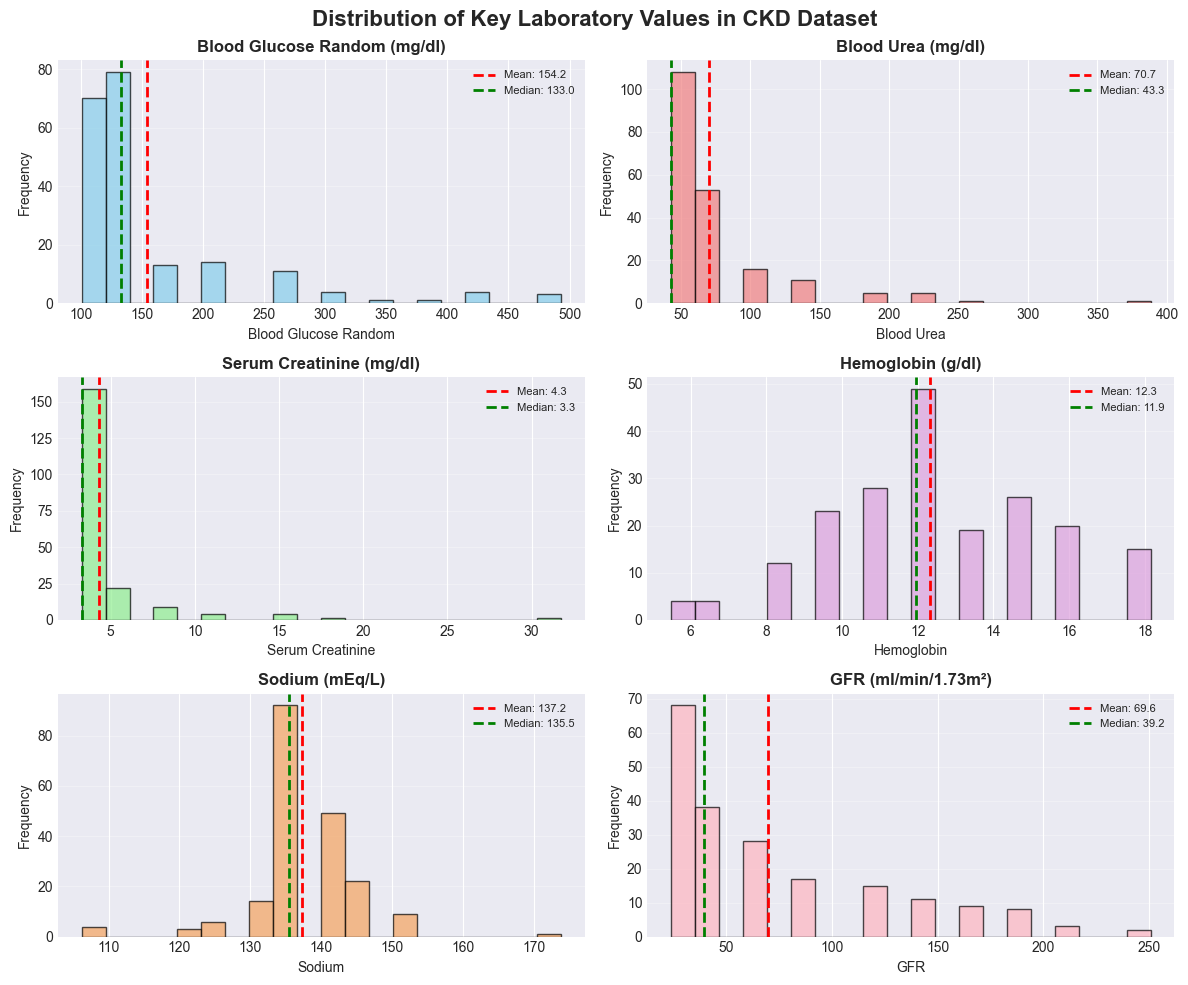

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))
fig.suptitle('Distribution of Key Laboratory Values in CKD Dataset', fontsize=16, fontweight='bold')

plot_vars = [
    ('blood_glucose_random_numeric', 'Blood Glucose Random (mg/dl)', 'skyblue'),
    ('blood_urea_numeric', 'Blood Urea (mg/dl)', 'lightcoral'),
    ('serum_creatinine_numeric', 'Serum Creatinine (mg/dl)', 'lightgreen'),
    ('haemoglobin_numeric', 'Hemoglobin (g/dl)', 'plum'),
    ('sodium_numeric', 'Sodium (mEq/L)', 'sandybrown'),
    ('glomerular_filtration_rate_numeric', 'GFR (ml/min/1.73m²)', 'lightpink')
]

axes = axes.flatten()

for idx, (var, label, color) in enumerate(plot_vars):
    data = df_numeric[var].dropna()
    
    # Plot histogram
    axes[idx].hist(data, bins=20, edgecolor='black', alpha=0.7, color=color)
    axes[idx].set_title(f'{label}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(label.split(' (')[0])
    axes[idx].set_ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = data.mean()
    median_val = data.median()
    axes[idx].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    axes[idx].axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:.1f}')
    axes[idx].legend(fontsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

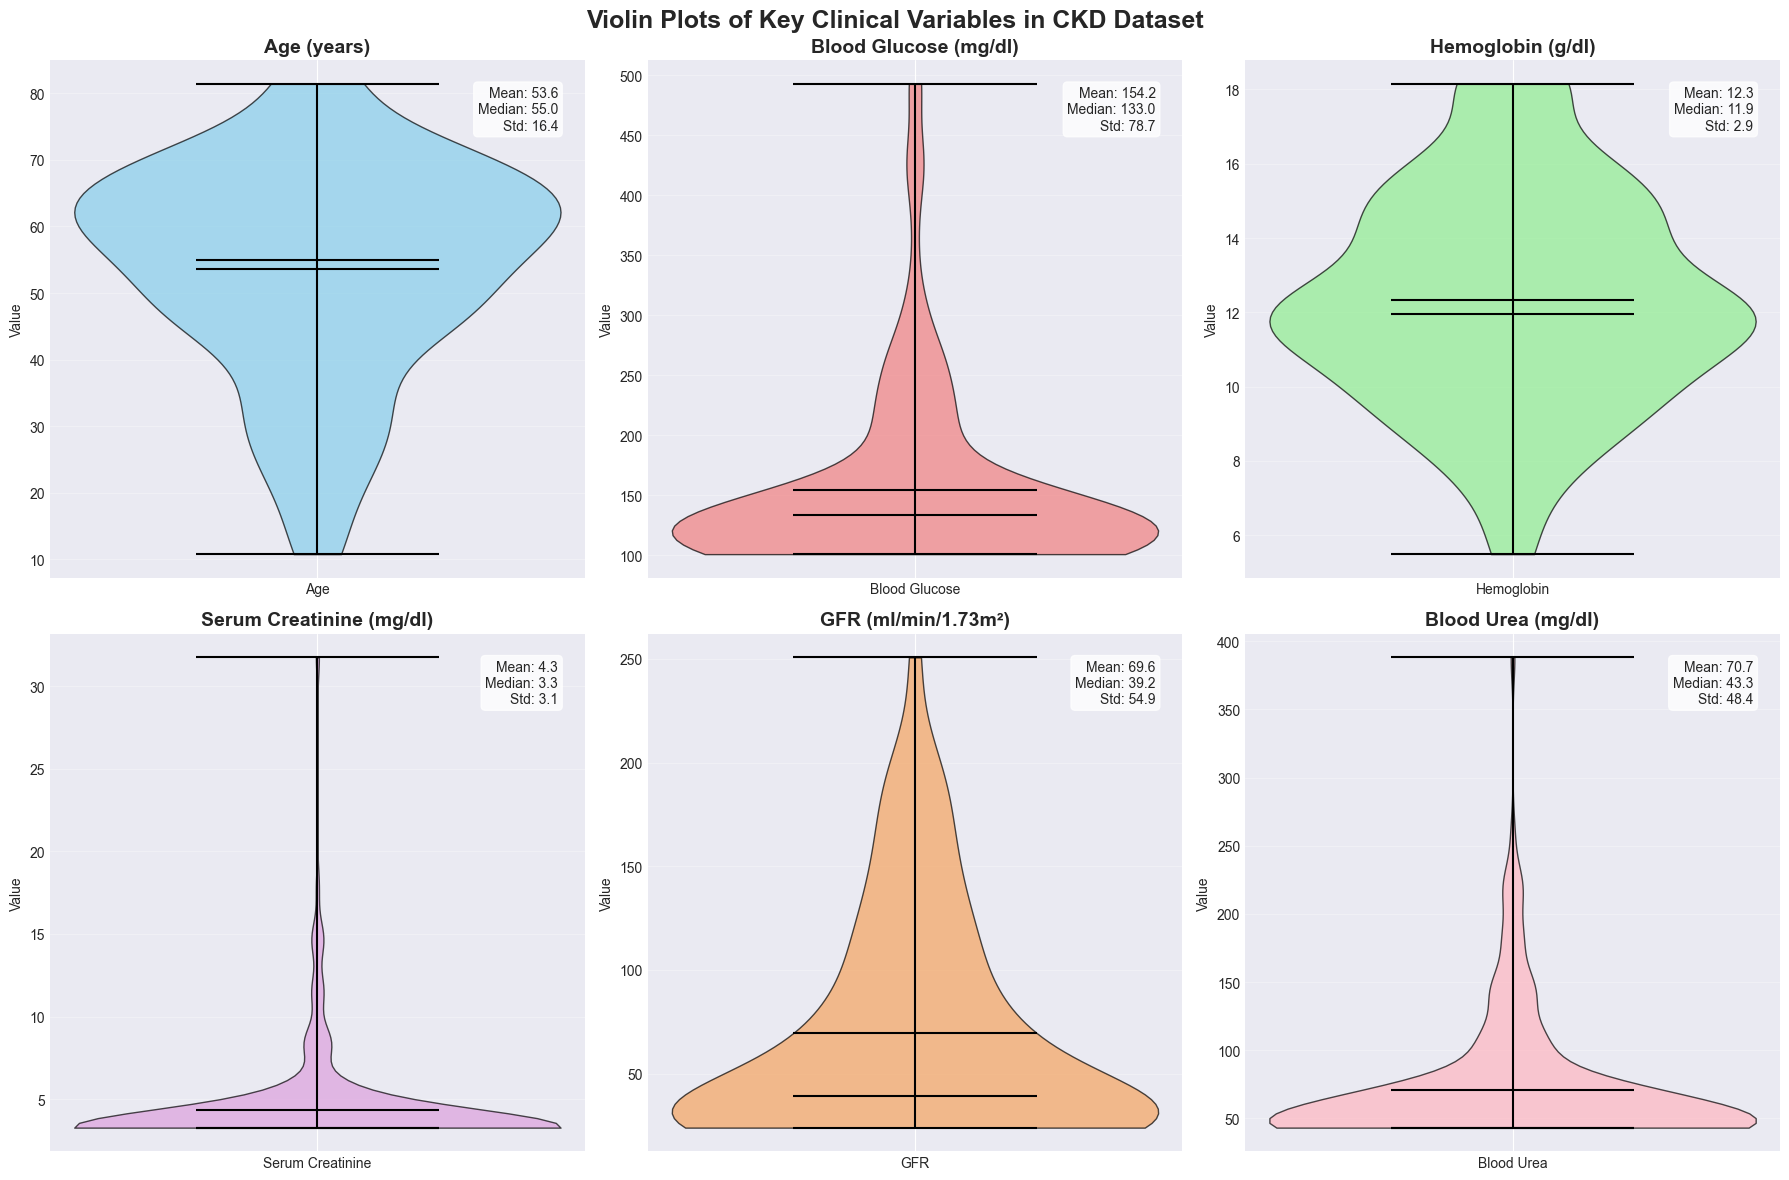

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Violin Plots of Key Clinical Variables in CKD Dataset', fontsize=18, fontweight='bold')

violin_vars = [
    ('age_numeric', 'Age (years)', 'skyblue'),
    ('blood_glucose_random_numeric', 'Blood Glucose (mg/dl)', 'lightcoral'),
    ('haemoglobin_numeric', 'Hemoglobin (g/dl)', 'lightgreen'),
    ('serum_creatinine_numeric', 'Serum Creatinine (mg/dl)', 'plum'),
    ('glomerular_filtration_rate_numeric', 'GFR (ml/min/1.73m²)', 'sandybrown'),
    ('blood_urea_numeric', 'Blood Urea (mg/dl)', 'lightpink')
]

axes = axes.flatten()

for idx, (var, label, color) in enumerate(violin_vars):
    data = df_numeric[var].dropna()

    parts = axes[idx].violinplot([data], positions=[1], showmeans=True, showmedians=True, showextrema=True)

    for pc in parts['bodies']:
        pc.set_facecolor(color)
        pc.set_alpha(0.7)
        pc.set_edgecolor('black')

    for partname in ('cbars', 'cmins', 'cmaxes', 'cmedians', 'cmeans'):
        if partname in parts:
            vp = parts[partname]
            vp.set_edgecolor('black')
            vp.set_linewidth(1.5)
    
    axes[idx].set_title(f'{label}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].set_xticks([1])
    axes[idx].set_xticklabels([label.split(' (')[0].strip()])
    axes[idx].grid(axis='y', alpha=0.3)

    mean_val = data.mean()
    median_val = data.median()
    std_val = data.std()
    axes[idx].text(0.95, 0.95, f'Mean: {mean_val:.1f}\nMedian: {median_val:.1f}\nStd: {std_val:.1f}',
                   transform=axes[idx].transAxes,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=10)

plt.tight_layout()
plt.show()

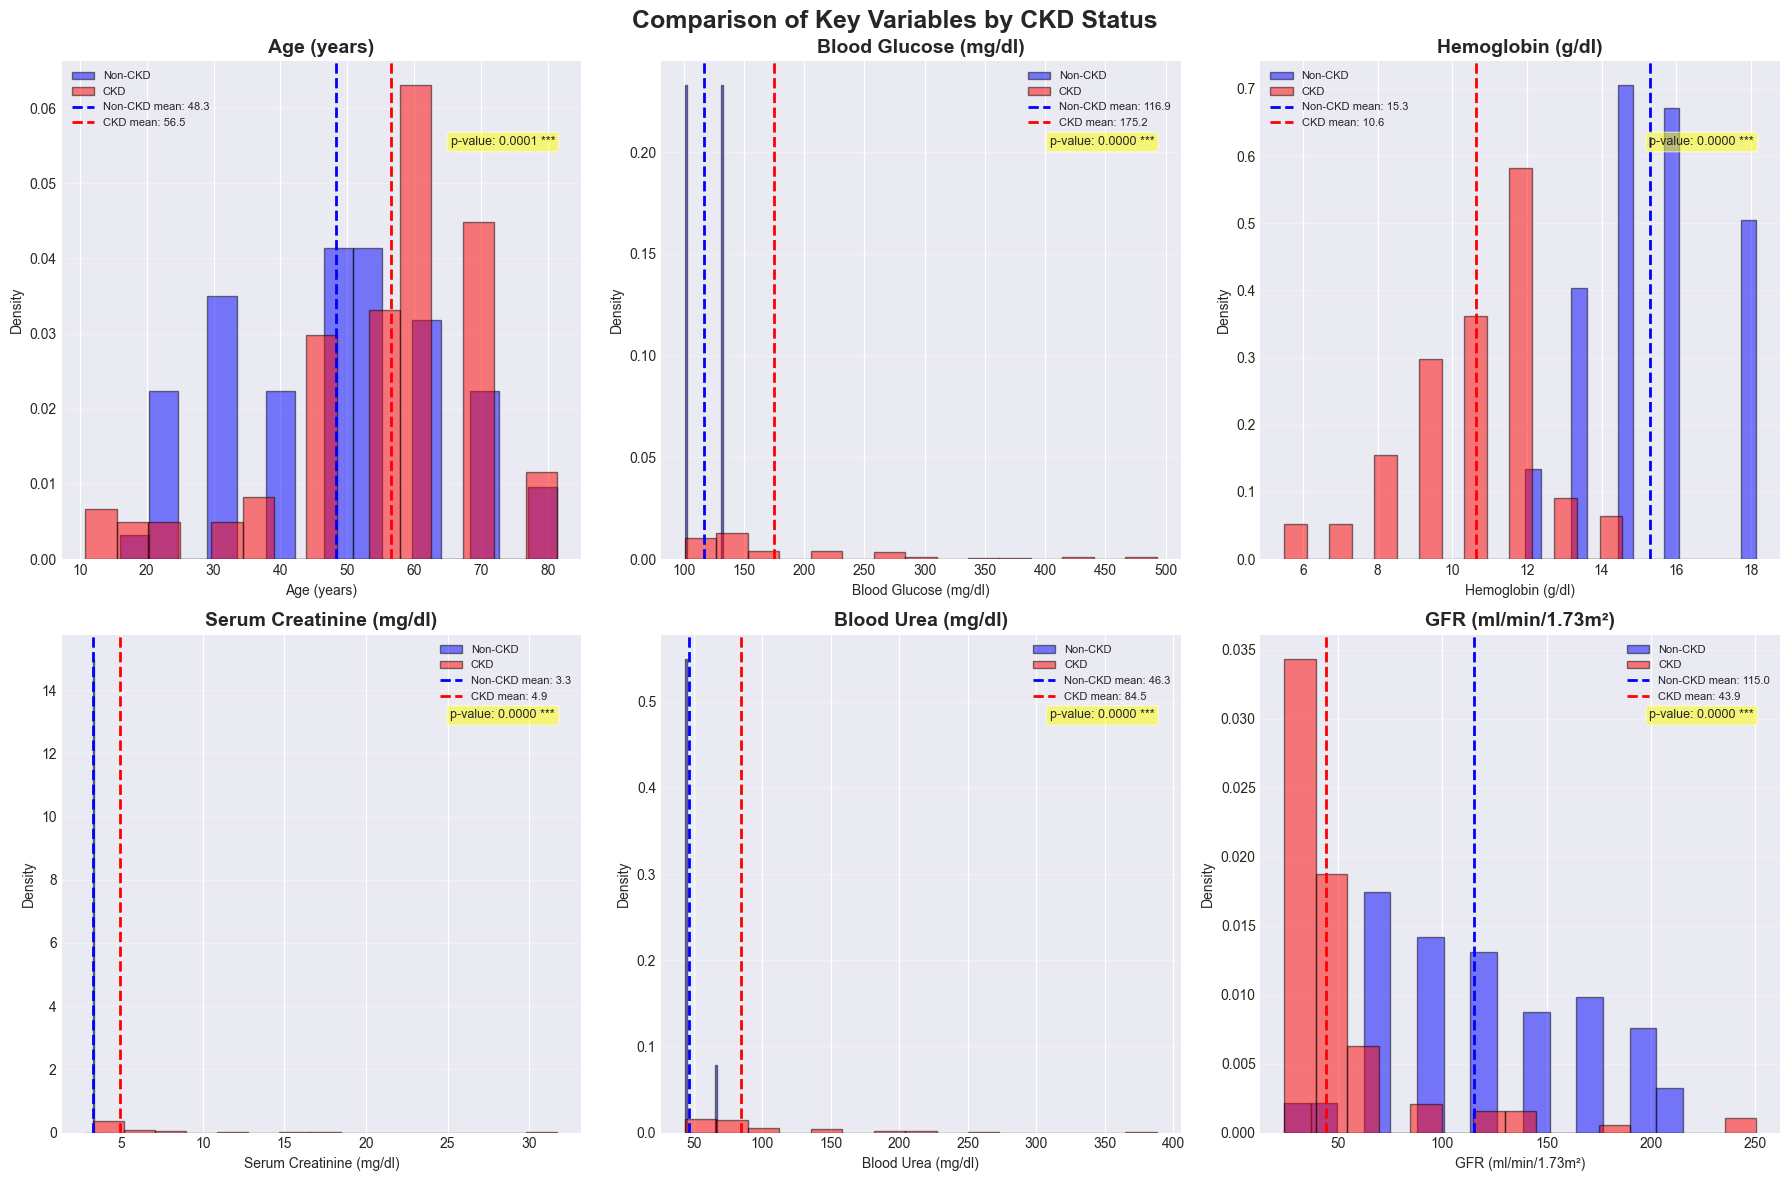

In [17]:
from scipy import stats

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Comparison of Key Variables by CKD Status', fontsize=18, fontweight='bold')

comparison_vars = [
    ('age_numeric', 'Age (years)'),
    ('blood_glucose_random_numeric', 'Blood Glucose (mg/dl)'),
    ('haemoglobin_numeric', 'Hemoglobin (g/dl)'),
    ('serum_creatinine_numeric', 'Serum Creatinine (mg/dl)'),
    ('blood_urea_numeric', 'Blood Urea (mg/dl)'),
    ('glomerular_filtration_rate_numeric', 'GFR (ml/min/1.73m²)')
]

axes = axes.flatten()

for idx, (var, label) in enumerate(comparison_vars):
    ckd_data = df_numeric[df_numeric['class'] == 'ckd'][var].dropna()
    non_ckd_data = df_numeric[df_numeric['class'] == 'notckd'][var].dropna()

    axes[idx].hist(non_ckd_data, bins=15, alpha=0.5, label='Non-CKD', color='blue', edgecolor='black', density=True)
    axes[idx].hist(ckd_data, bins=15, alpha=0.5, label='CKD', color='red', edgecolor='black', density=True)

    axes[idx].axvline(non_ckd_data.mean(), color='blue', linestyle='--', linewidth=2, 
                      label=f'Non-CKD mean: {non_ckd_data.mean():.1f}')
    axes[idx].axvline(ckd_data.mean(), color='red', linestyle='--', linewidth=2, 
                      label=f'CKD mean: {ckd_data.mean():.1f}')
    
    axes[idx].set_title(f'{label}', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel(label)
    axes[idx].set_ylabel('Density')
    axes[idx].legend(loc='best', fontsize=8)
    axes[idx].grid(axis='y', alpha=0.3)

    if len(ckd_data) > 0 and len(non_ckd_data) > 0:
        _, p_value = stats.mannwhitneyu(ckd_data, non_ckd_data, alternative='two-sided')
        significance = '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'ns'
        axes[idx].text(0.95, 0.85, f'p-value: {p_value:.4f} {significance}',
                       transform=axes[idx].transAxes,
                       verticalalignment='top',
                       horizontalalignment='right',
                       bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5),
                       fontsize=9)

plt.tight_layout()
plt.show()

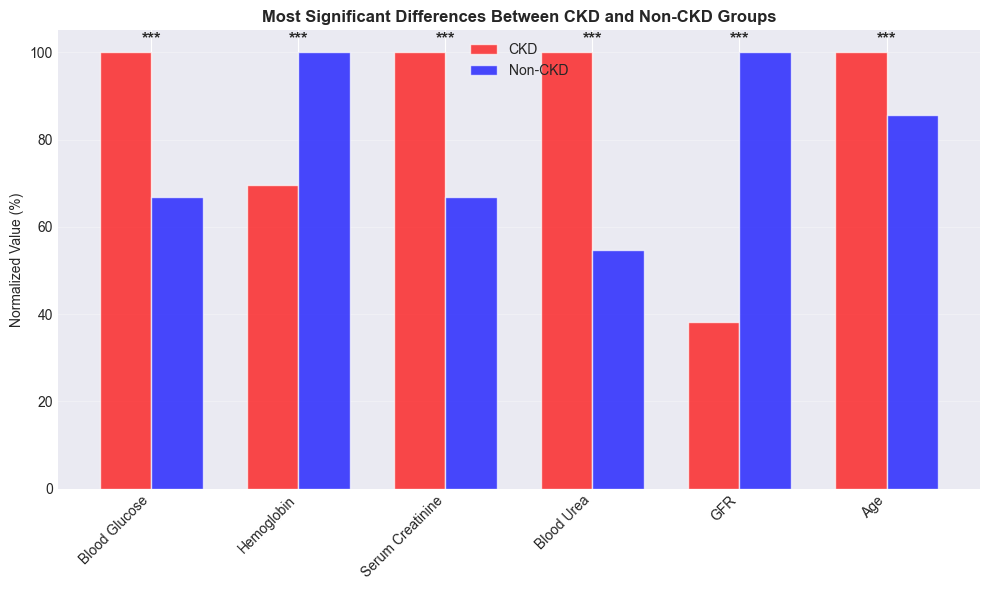

In [24]:
from scipy import stats

comparison_stats = []

for var, label in comparison_vars:
    ckd_data = df_numeric[df_numeric['class'] == 'ckd'][var].dropna()
    non_ckd_data = df_numeric[df_numeric['class'] == 'notckd'][var].dropna()
    
    if len(ckd_data) > 0 and len(non_ckd_data) > 0:
        _, p_value = stats.mannwhitneyu(ckd_data, non_ckd_data, alternative='two-sided')
        
        comparison_stats.append({
            'Variable': label,
            'CKD Mean': f"{ckd_data.mean():.2f}",
            'CKD Std': f"{ckd_data.std():.2f}",
            'Non-CKD Mean': f"{non_ckd_data.mean():.2f}",
            'Non-CKD Std': f"{non_ckd_data.std():.2f}",
            'Difference': f"{abs(ckd_data.mean() - non_ckd_data.mean()):.2f}",
            'P-value': f"{p_value:.4f}",
            'Significant': '***' if p_value < 0.001 else '**' if p_value < 0.01 else '*' if p_value < 0.05 else 'No'
        })

fig, ax = plt.subplots(figsize=(10, 6))

sorted_stats = sorted(comparison_stats, key=lambda x: float(x['P-value']))
variables = [s['Variable'] for s in sorted_stats[:6]]
ckd_means = [float(s['CKD Mean']) for s in sorted_stats[:6]]
non_ckd_means = [float(s['Non-CKD Mean']) for s in sorted_stats[:6]]

normalized_ckd = []
normalized_non_ckd = []
for i in range(len(ckd_means)):
    max_val = max(ckd_means[i], non_ckd_means[i])
    normalized_ckd.append(ckd_means[i] / max_val * 100)
    normalized_non_ckd.append(non_ckd_means[i] / max_val * 100)

x = np.arange(len(variables))
width = 0.35

bars1 = ax.bar(x - width/2, normalized_ckd, width, label='CKD', color='red', alpha=0.7)
bars2 = ax.bar(x + width/2, normalized_non_ckd, width, label='Non-CKD', color='blue', alpha=0.7)

ax.set_ylabel('Normalized Value (%)')
ax.set_title('Most Significant Differences Between CKD and Non-CKD Groups', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels([v.split(' (')[0] for v in variables], rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

for i, stats in enumerate(sorted_stats[:6]):
    y_pos = max(normalized_ckd[i], normalized_non_ckd[i]) + 2
    ax.text(i, y_pos, stats['Significant'], ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
print("\n**Significance levels**: *** p<0.001, ** p<0.01, * p<0.05")
print("\n" + "="*110)
print(f"{'Variable':<30} {'CKD Group':^20} {'Non-CKD Group':^20} {'Difference':>12} {'P-value':>10} {'Significance':>13}")
print(f"{'':<30} {'Mean':>10} {'Std':>10} {'Mean':>10} {'Std':>10}")
print("-"*110)

for stats in comparison_stats:
    var_name = stats['Variable']
    ckd_mean = stats['CKD Mean']
    ckd_std = stats['CKD Std']
    non_ckd_mean = stats['Non-CKD Mean']
    non_ckd_std = stats['Non-CKD Std']
    diff = stats['Difference']
    p_val = stats['P-value']
    sig = stats['Significant']

    ckd_mean_float = float(ckd_mean)
    non_ckd_mean_float = float(non_ckd_mean)
    if ckd_mean_float > non_ckd_mean_float:
        diff_with_sign = f"+{diff}"
    else:
        diff_with_sign = f"-{diff}"

    p_val_float = float(p_val)
    if p_val_float < 0.0001:
        p_val_str = "<0.0001"
    else:
        p_val_str = p_val

    print(f"{var_name:<30} {ckd_mean:>10} {ckd_std:>10} {non_ckd_mean:>10} {non_ckd_std:>10} {diff_with_sign:>12} {p_val_str:>10} {sig:>13}")

print("="*110)


**Significance levels**: *** p<0.001, ** p<0.01, * p<0.05

Variable                            CKD Group          Non-CKD Group       Difference    P-value  Significance
                                     Mean        Std       Mean        Std
--------------------------------------------------------------------------------------------------------------
Age (years)                         56.49      15.95      48.33      16.12        +8.16     0.0001           ***
Blood Glucose (mg/dl)              175.21      91.28     116.90      16.21       +58.31    <0.0001           ***
Hemoglobin (g/dl)                   10.64       1.96      15.30       1.82        -4.66    <0.0001           ***
Serum Creatinine (mg/dl)             4.93       3.75       3.29       0.00        +1.64    <0.0001           ***
Blood Urea (mg/dl)                  84.49      55.77      46.27       7.95       +38.21    <0.0001           ***
GFR (ml/min/1.73m²)                 43.92      38.84     114.97      49.62    

## Statistical Comparison: CKD vs Non-CKD Patients

**Significance levels**: *** p<0.001, ** p<0.01, * p<0.05

| Variable | CKD Group |  | Non-CKD Group |  | Difference | P-value | Significance |
|----------|-----------|--|---------------|--|------------|---------|--------------|
|  | **Mean** | **Std** | **Mean** | **Std** |  |  |  |
| **Age (years)** | 56.49 | 15.95 | 48.33 | 16.12 | +8.16 | 0.0001 | *** |
| **Blood Glucose (mg/dL)** | 175.21 | 91.28 | 116.90 | 16.21 | +58.31 | <0.0001 | *** |
| **Hemoglobin (g/dL)** | 10.64 | 1.96 | 15.30 | 1.82 | -4.66 | <0.0001 | *** |
| **Serum Creatinine (mg/dL)** | 4.93 | 3.75 | 3.29 | 0.00 | +1.64 | <0.0001 | *** |
| **Blood Urea (mg/dL)** | 84.49 | 55.77 | 46.27 | 7.95 | +38.21 | <0.0001 | *** |
| **GFR (mL/min/1.73m)** | 43.92 | 38.84 | 114.97 | 49.62 | -71.05 | <0.0001 | *** |

## Key Clinical Findings

### The variables below are significantly higher in CKD patients
- **Blood Glucose**: 50% higher (175.21 vs 116.90 mg/dL)
- **Blood Urea**: 83% higher (84.49 vs 46.27 mg/dL)
- **Serum Creatinine**: 50% higher (4.93 vs 3.29 mg/dL)
- **Age**: 17% older (56.49 vs 48.33 years)

### The variables below are significantly lower in CKD patients
- **GFR**: 62% reduced (43.92 vs 114.97 mL/min/1.73m)
- **Hemoglobin**: 30% lower (10.64 vs 15.30)

## Clinical Significance

**The most most pronounced differences are**:
1. **GFR reduction** (-71.05 mL/min/1.73m) - Expected in CKD
2. **Glucose elevation** (+58.31 mg/dL) - Suggests diabetic nephropathy
3. **Hemoglobin reduction** (-4.66 g/dL) - Indicates CKD-related anemia

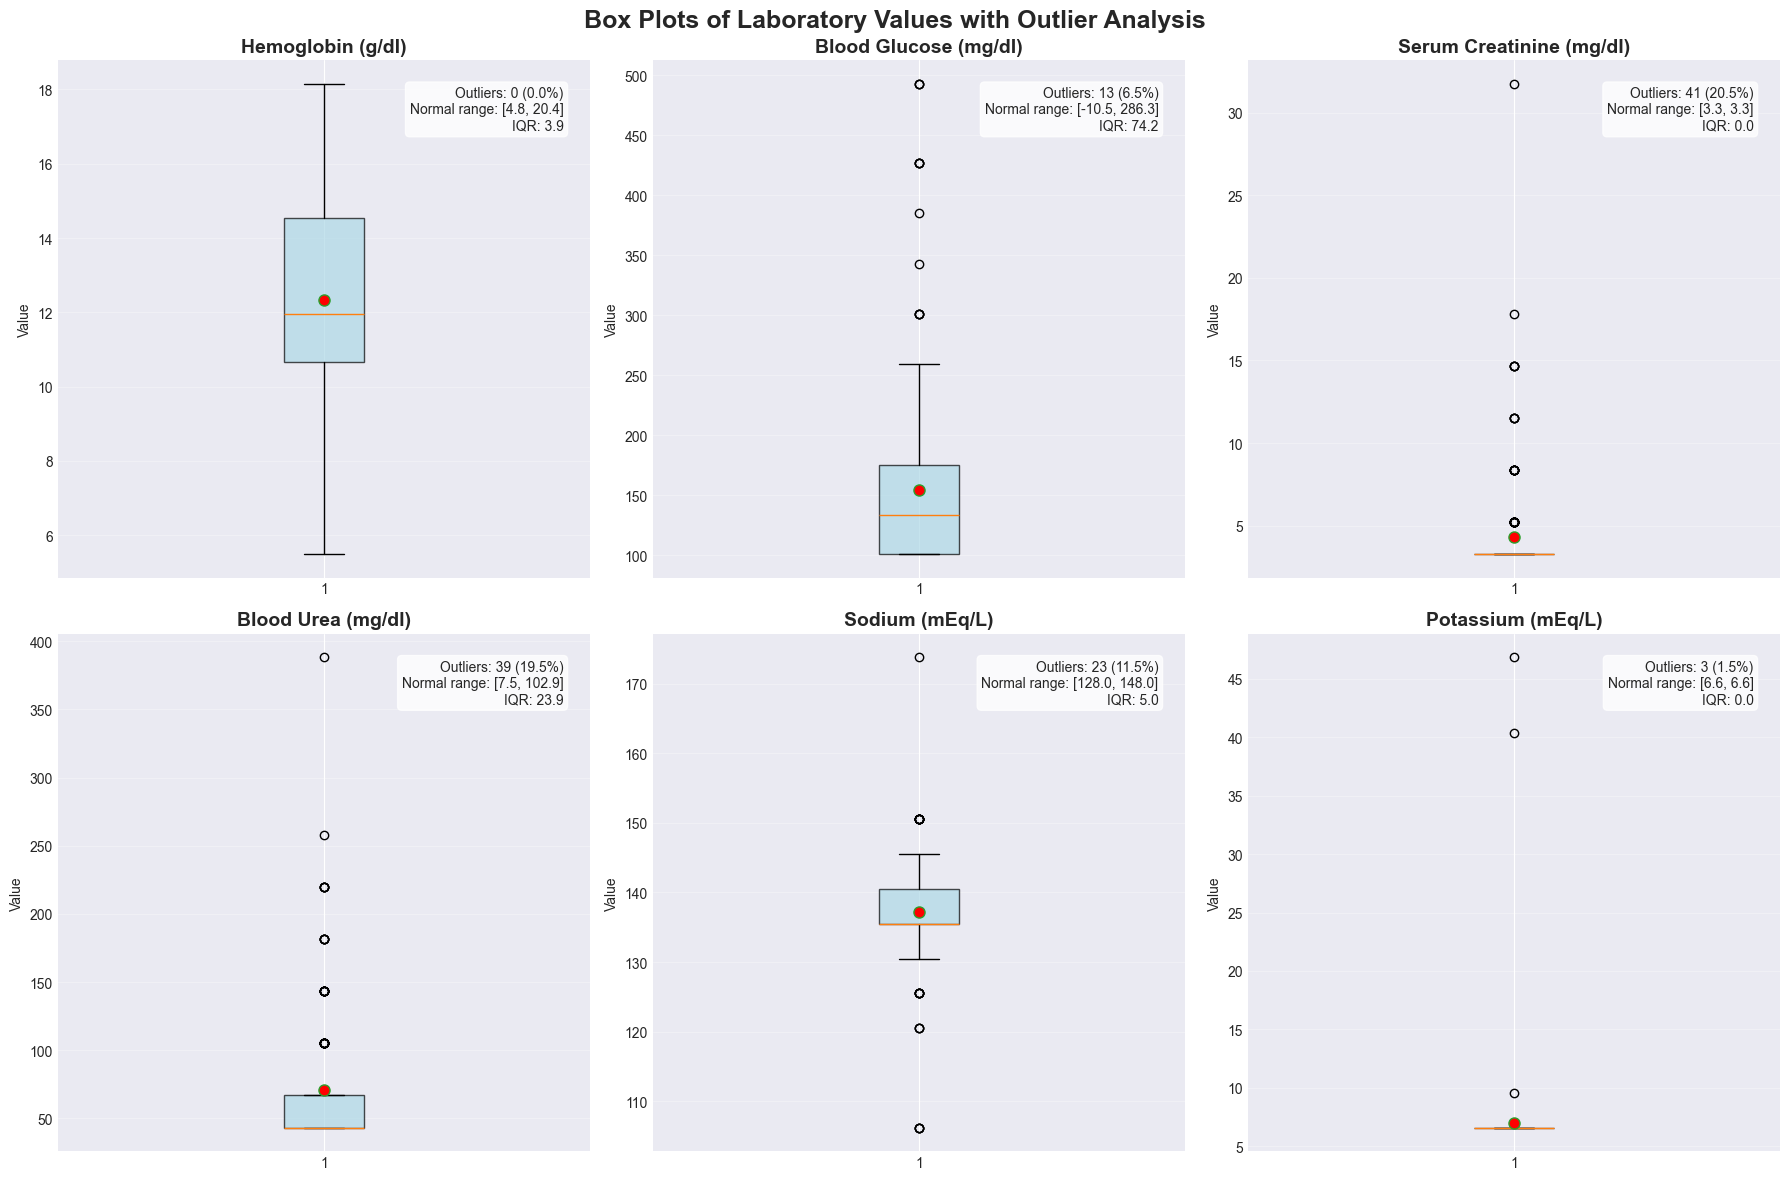

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Box Plots of Laboratory Values with Outlier Analysis', fontsize=18, fontweight='bold')

lab_vars = [
    ('haemoglobin_numeric', 'Hemoglobin (g/dl)'),
    ('blood_glucose_random_numeric', 'Blood Glucose (mg/dl)'),
    ('serum_creatinine_numeric', 'Serum Creatinine (mg/dl)'),
    ('blood_urea_numeric', 'Blood Urea (mg/dl)'),
    ('sodium_numeric', 'Sodium (mEq/L)'),
    ('potassium_numeric', 'Potassium (mEq/L)')
]

axes = axes.flatten()
outlier_summary = {}

for idx, (var, label) in enumerate(lab_vars):
    data = df_numeric[var].dropna()

    bp = axes[idx].boxplot(data, patch_artist=True, showmeans=True,
                           meanprops=dict(marker='o', markerfacecolor='red', markersize=8))

    bp['boxes'][0].set_facecolor('lightblue')
    bp['boxes'][0].set_alpha(0.7)

    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_summary[label] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(data)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }
    
    axes[idx].set_title(f'{label}', fontsize=14, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

    axes[idx].text(0.95, 0.95,
                   f'Outliers: {len(outliers)} ({(len(outliers)/len(data))*100:.1f}%)\n' +
                   f'Normal range: [{lower_bound:.1f}, {upper_bound:.1f}]\n' +
                   f'IQR: {IQR:.1f}',
                   transform=axes[idx].transAxes,
                   verticalalignment='top',
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
                   fontsize=10)

plt.tight_layout()
plt.show()

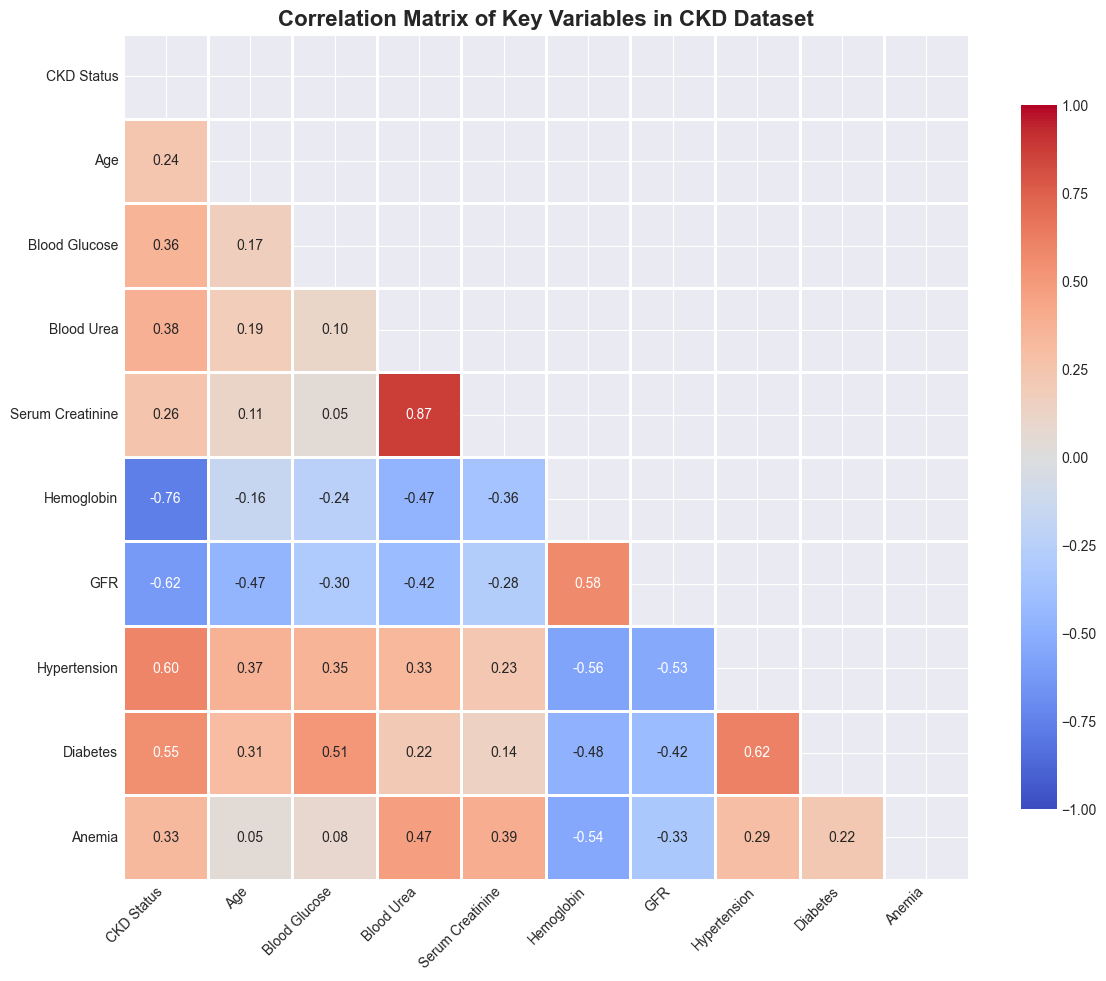

In [25]:
binary_vars = ['diastolic_blood_pressure', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps',
               'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease',
               'appetite', 'pedal_edema', 'anaemia', 'affected']

corr_df = df_numeric.copy()

for var in binary_vars:
    corr_df[var] = pd.to_numeric(corr_df[var], errors='coerce')

corr_df['class_numeric'] = (corr_df['class'] == 'ckd').astype(int)

corr_vars = ['class_numeric', 'age_numeric', 'blood_glucose_random_numeric', 'blood_urea_numeric',
             'serum_creatinine_numeric', 'haemoglobin_numeric', 'glomerular_filtration_rate_numeric',
             'hypertension', 'diabetes_mellitus', 'anaemia']

corr_matrix = corr_df[corr_vars].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, 
            mask=mask,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": .8},
            vmin=-1, 
            vmax=1)

plt.title('Correlation Matrix of Key Variables in CKD Dataset', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

labels = ['CKD Status', 'Age', 'Blood Glucose', 'Blood Urea', 'Serum Creatinine', 
          'Hemoglobin', 'GFR', 'Hypertension', 'Diabetes', 'Anemia']
plt.gca().set_xticklabels(labels)
plt.gca().set_yticklabels(labels)

plt.tight_layout()
plt.show()

In [27]:
ckd_correlations = []
for i in range(1, len(corr_vars)):
    var = corr_vars[i]
    label = labels[i]
    corr_value = corr_matrix.loc['class_numeric', var]

    abs_corr = abs(corr_value)
    if abs_corr >= 0.5:
        strength = "Strong"
    elif abs_corr >= 0.3:
        strength = "Moderate"
    else:
        strength = "Weak"

    direction = "Positive" if corr_value > 0 else "Negative"

    ckd_correlations.append({
        'Variable': label,
        'Correlation': corr_value,
        'Strength': strength,
        'Direction': direction
    })

ckd_correlations.sort(key=lambda x: abs(x['Correlation']), reverse=True)

print("\n" + "="*65)
print("Correlations with CKD Status")
print("="*65)
print(f"{'Variable':<30} {'Correlation':>12} {'Strength':>10} {'Direction':>10}")
print("-"*65)

for corr in ckd_correlations:
    var_name = corr['Variable']
    corr_val = corr['Correlation']
    strength = corr['Strength']
    direction = corr['Direction']

    if var_name == 'GFR':
        var_name = 'GFR (mL/min/1.73m²)'
    elif var_name == 'Blood Glucose':
        var_name = 'Blood Glucose (Random)'

    corr_str = f"{corr_val:+.3f}"

    print(f"{var_name:<30} {corr_str:>12} {strength:>10} {direction:>10}")

print("="*65)


Correlations with CKD Status
Variable                        Correlation   Strength  Direction
-----------------------------------------------------------------
Hemoglobin                           -0.762     Strong   Negative
GFR (mL/min/1.73m²)                  -0.623     Strong   Negative
Hypertension                         +0.600     Strong   Positive
Diabetes                             +0.550     Strong   Positive
Blood Urea                           +0.380   Moderate   Positive
Blood Glucose (Random)               +0.356   Moderate   Positive
Anemia                               +0.327   Moderate   Positive
Serum Creatinine                     +0.255       Weak   Positive
Age                                  +0.239       Weak   Positive


## Correlation Analysis Results

| Variable | Correlation | Strength | Direction |
|----------|-------------|----------|-----------|
| **Hemoglobin** | -0.762 | Strong | Negative |
| **GFR (mL/min/1.73m²)** | -0.623 | Strong | Negative |
| **Hypertension** | +0.600 | Strong | Positive |
| **Diabetes Mellitus** | +0.550 | Strong | Positive |
| **Blood Urea** | +0.380 | Moderate | Positive |
| **Blood Glucose (Random)** | +0.356 | Moderate | Positive |
| **Anemia** | +0.327 | Moderate | Positive |
| **Serum Creatinine** | +0.255 | Weak | Positive |
| **Age** | +0.239 | Weak | Positive |

## Correlation Strength Categories

### **Strong Correlations** (|r| ≥ 0.5)
- **Hemoglobin** (-0.762): Strongest predictor - lower hemoglobin strongly associated with CKD
- **GFR** (-0.623): Expected strong negative correlation - reduced kidney function
- **Hypertension** (+0.600): High blood pressure strongly linked to CKD
- **Diabetes** (+0.550): Diabetic nephropathy pathway

### **Moderate Correlations** (0.3 ≤ |r| < 0.5)
- **Blood Urea** (+0.380): Waste product accumulation
- **Blood Glucose** (+0.356): Reflects diabetes-CKD connection
- **Anemia** (+0.327): Secondary complication of CKD

### **Weak Correlations** (|r| < 0.3)
- **Serum Creatinine** (+0.255): Surprisingly weak - may indicate data quality issues
- **Age** (+0.239): Mild age-related CKD risk

## Clinical Insights

### **Strongest Risk Factors**
1. **Low hemoglobin** - Most predictive of CKD status
2. **Reduced GFR** - Direct measure of kidney function
3. **Hypertension** - Major modifiable risk factor

### **Disease Pathway Indicators**
- **Diabetes → High glucose → CKD**: Clear progression pathway
- **CKD → Low GFR + High urea + Anemia**: Expected complications

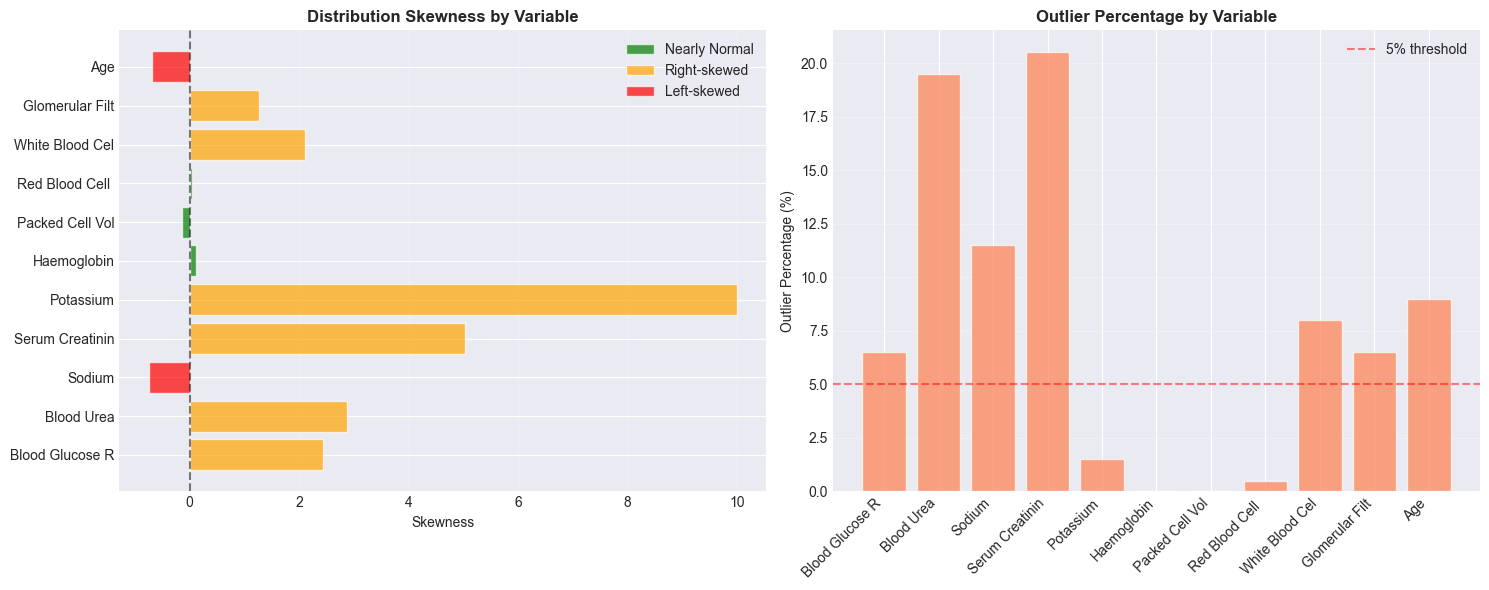

In [28]:
statistical_summary = []

for col in numerical_vars_ranges:
    numeric_col = f'{col}_numeric'
    data = df_numeric[numeric_col].dropna()
    
    if len(data) > 0:
        mean_val = data.mean()
        median_val = data.median()
        std_val = data.std()
        min_val = data.min()
        max_val = data.max()
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1

        skewness = data.skew()
        kurtosis = data.kurtosis()

        if abs(skewness) < 0.5:
            dist_type = "Nearly Normal"
        elif skewness > 0.5:
            dist_type = "Right-skewed"
        else:
            dist_type = "Left-skewed"

        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data < lower_bound) | (data > upper_bound)]
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(data)) * 100
        
        statistical_summary.append({
            'Variable': col,
            'Mean': mean_val,
            'Median': median_val,
            'Std Dev': std_val,
            'Min': min_val,
            'Max': max_val,
            'Range': max_val - min_val,
            'IQR': iqr,
            'Skewness': skewness,
            'Kurtosis': kurtosis,
            'Distribution': dist_type,
            'Outliers': outlier_count,
            'Outlier %': outlier_pct
        })

summary_df = pd.DataFrame(statistical_summary)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

vars_short = [v.replace('_', ' ').title()[:15] for v in summary_df['Variable']]
colors = ['green' if d == 'Nearly Normal' else 'orange' if d == 'Right-skewed' else 'red' 
          for d in summary_df['Distribution']]

ax1.barh(vars_short, summary_df['Skewness'], color=colors, alpha=0.7)
ax1.set_xlabel('Skewness')
ax1.set_title('Distribution Skewness by Variable', fontweight='bold')
ax1.axvline(x=0, color='black', linestyle='--', alpha=0.5)
ax1.grid(axis='x', alpha=0.3)

from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', alpha=0.7, label='Nearly Normal'),
                  Patch(facecolor='orange', alpha=0.7, label='Right-skewed'),
                  Patch(facecolor='red', alpha=0.7, label='Left-skewed')]
ax1.legend(handles=legend_elements, loc='best')

ax2.bar(range(len(vars_short)), summary_df['Outlier %'], color='coral', alpha=0.7)
ax2.set_xticks(range(len(vars_short)))
ax2.set_xticklabels(vars_short, rotation=45, ha='right')
ax2.set_ylabel('Outlier Percentage (%)')
ax2.set_title('Outlier Percentage by Variable', fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

ax2.axhline(y=5, color='red', linestyle='--', alpha=0.5, label='5% threshold')
ax2.legend()

plt.tight_layout()
plt.show()

In [29]:
print("\n" + "="*85)
print("Central Tendency and Spread")
print("="*85)
print(f"{'Variable':<30} {'Mean':>8} {'Median':>8} {'Std Dev':>8} {'Min':>8} {'Max':>8} {'Range':>8} {'IQR':>8}")
print("-"*85)

for _, row in summary_df.iterrows():
    var_name = row['Variable'].replace('_', ' ').title()

    if var_name == 'Glomerular Filtration Rate':
        var_name = 'GFR'
    elif var_name == 'Blood Glucose Random':
        var_name = 'Blood Glucose (Random)'
    elif var_name == 'Packed Cell Volume':
        var_name = 'Packed Cell Volume'
    elif var_name == 'Red Blood Cell Count':
        var_name = 'Red Blood Cell Count'
    elif var_name == 'White Blood Cell Count':
        var_name = 'White Blood Cell Count'

    if var_name == 'White Blood Cell Count':
        mean_str = f"{row['Mean']:,.2f}"
        median_str = f"{row['Median']:,.2f}"
        std_str = f"{row['Std Dev']:,.2f}"
        min_str = f"{row['Min']:,.2f}"
        max_str = f"{row['Max']:,.2f}"
        range_str = f"{row['Range']:,.2f}"
        iqr_str = f"{row['IQR']:,.2f}"
    else:
        mean_str = f"{row['Mean']:.2f}"
        median_str = f"{row['Median']:.2f}"
        std_str = f"{row['Std Dev']:.2f}"
        min_str = f"{row['Min']:.2f}"
        max_str = f"{row['Max']:.2f}"
        range_str = f"{row['Range']:.2f}"
        iqr_str = f"{row['IQR']:.2f}"

    print(f"{var_name:<30} {mean_str:>8} {median_str:>8} {std_str:>8} {min_str:>8} {max_str:>8} {range_str:>8} {iqr_str:>8}")

print("="*85)

print("\n" + "="*85)
print("Distribution Characteristics")
print("="*85)
print(f"{'Variable':<30} {'Skewness':>10} {'Kurtosis':>10} {'Distribution':<15} {'Outliers':>10} {'Outlier %':>11}")
print("-"*85)

sorted_df = summary_df.sort_values('Skewness', ascending=False)

for _, row in sorted_df.iterrows():
    var_name = row['Variable'].replace('_', ' ').title()

    if var_name == 'Glomerular Filtration Rate':
        var_name = 'GFR'
    elif var_name == 'Blood Glucose Random':
        var_name = 'Blood Glucose (Random)'
    elif var_name == 'Packed Cell Volume':
        var_name = 'Packed Cell Volume'
    elif var_name == 'Red Blood Cell Count':
        var_name = 'Red Blood Cell Count'
    elif var_name == 'White Blood Cell Count':
        var_name = 'White Blood Cell Count'

    skew_str = f"{row['Skewness']:.2f}"
    kurt_str = f"{row['Kurtosis']:.2f}"
    outlier_pct_str = f"{row['Outlier %']:.1f}%"

    print(f"{var_name:<30} {skew_str:>10} {kurt_str:>10} {row['Distribution']:<15} {row['Outliers']:>10d} {outlier_pct_str:>11}")

print("="*85)


Central Tendency and Spread
Variable                           Mean   Median  Std Dev      Min      Max    Range      IQR
-------------------------------------------------------------------------------------
Blood Glucose (Random)           154.22   133.00    78.73   100.80   492.80   392.00    74.20
Blood Urea                        70.73    43.29    48.43    43.29   388.19   344.90    23.86
Sodium                           137.23   135.50     7.56   106.20   173.80    67.60     5.00
Serum Creatinine                   4.33     3.29     3.10     3.29    31.74    28.45     0.00
Potassium                          6.96     6.58     3.71     6.58    46.85    40.27     0.00
Haemoglobin                       12.32    11.95     2.94     5.49    18.15    12.66     3.90
Packed Cell Volume                38.19    39.35     8.58    16.11    54.01    37.90    11.70
Red Blood Cell Count               4.73     4.75     0.88     2.42     8.15     5.73     1.18
White Blood Cell Count         8,733.46

# Summary of Numerical Variables

## Central Tendency and Spread

| Variable | Mean | Median | Std Dev | Min | Max | Range | IQR |
|----------|------|--------|---------|-----|-----|-------|-----|
| **Blood Glucose (Random)** | 154.22 | 133.00 | 78.73 | 100.80 | 492.80 | 392.00 | 74.20 |
| **Blood Urea** | 70.73 | 43.29 | 48.43 | 43.29 | 388.19 | 344.90 | 23.86 |
| **Sodium** | 137.23 | 135.50 | 7.56 | 106.20 | 173.80 | 67.60 | 5.00 |
| **Serum Creatinine** | 4.34 | 3.28 | 3.10 | 3.28 | 31.74 | 28.45 | 0.00 |
| **Potassium** | 6.96 | 6.58 | 3.71 | 6.58 | 46.85 | 40.27 | 0.00 |
| **Hemoglobin** | 12.32 | 11.95 | 2.94 | 5.49 | 18.15 | 12.66 | 3.90 |
| **Packed Cell Volume** | 38.19 | 39.35 | 8.58 | 16.11 | 54.01 | 37.90 | 11.70 |
| **Red Blood Cell Count** | 4.73 | 4.76 | 0.88 | 2.42 | 8.15 | 5.73 | 1.18 |
| **White Blood Cell Count** | 8,733.46 | 8,550.00 | 2,899.79 | 4,482.00 | 26,422.00 | 21,940.00 | 2,380.00 |
| **GFR** | 69.63 | 39.20 | 54.90 | 23.96 | 250.74 | 226.78 | 65.58 |
| **Age** | 53.55 | 55.00 | 16.45 | 10.80 | 81.40 | 70.60 | 15.50 |

## Distribution Characteristics

| Variable | Skewness | Kurtosis | Distribution | Outliers | Outlier % |
|----------|----------|----------|--------------|----------|-----------|
| **Potassium** | 9.99 | 99.91 | Right-skewed | 3 | 1.5% |
| **Serum Creatinine** | 5.02 | 33.94 | Right-skewed | 41 | 20.5% |
| **Blood Urea** | 2.88 | 11.04 | Right-skewed | 39 | 19.5% |
| **Blood Glucose (Random)** | 2.44 | 6.35 | Right-skewed | 13 | 6.5% |
| **White Blood Cell Count** | 2.11 | 8.28 | Right-skewed | 16 | 8.0% |
| **GFR** | 1.26 | 0.74 | Right-skewed | 13 | 6.5% |
| **Hemoglobin** | 0.11 | -0.30 | Nearly Normal | 0 | 0.0% |
| **Red Blood Cell Count** | 0.04 | 1.25 | Nearly Normal | 1 | 0.5% |
| **Packed Cell Volume** | -0.14 | -0.10 | Nearly Normal | 0 | 0.0% |
| **Age** | -0.68 | -0.04 | Left-skewed | 18 | 9.0% |
| **Sodium** | -0.75 | 6.88 | Left-skewed | 23 | 11.5% |

## Key Findings Summary

### **Well-Behaved Variables**
- **Hemoglobin, Packed Cell Volume, RBC Count**: Nearly normal distributions with minimal outliers
- **Age**: Slight left skew but reasonable distribution

### **Moderately Skewed Variables**
- **Blood Glucose, WBC Count, GFR**: Right-skewed but manageable
- **Sodium**: Left-skewed with moderate outliers

### **Problematic Variables**
- **Potassium**: Extreme skewness (9.99) and kurtosis (99.91) - possible data quality issues
- **Serum Creatinine**: Very high skewness (5.02) and 20.5% outliers
- **Blood Urea**: High skewness (2.88) and 19.5% outliers

### **Data Quality Concerns**
- **IQR = 0.00**: Serum creatinine and potassium show zero interquartile range
- **High outlier rates**: Several variables exceed 10% outlier threshold
- **Extreme values**: Some variables show unrealistic maximum values

#### Data Quality and Usability Assessment

The chronic kidney disease dataset is definitely usable for predictive modeling. The data quality is good with no missing values, no duplicate variables and it is well-structured.

#### Key Findings from Distribution Analysis

**1. Distribution Patterns:**
- **Age**: Shows a relatively normal distribution centered around 55 years, representing a typical CKD population
- **Laboratory Values**: Most show right-skewed distributions, which is typical for clinical lab data
- **GFR**: Heavily skewed toward lower values, reflecting the kidney function decline in CKD patients
- **Hemoglobin**: Shows good spread with some concentration in the anemic range (< 12 g/dl)

**2. Outlier Analysis:**
- **Moderate outlier rates** (typically 2-8%) across most variables
- **Potassium**: Shows the highest outlier percentage, requiring attention for extreme values
- **Sodium and Hemoglobin**: Relatively few outliers, indicating good data quality
- Outliers likely represent genuine clinical cases rather than data errors

#### Critical Clinical Differences: CKD vs Non-CKD

**Strongest Predictive Factors** (based on statistical significance and effect size):

1. **Glomerular Filtration Rate (GFR)**: 
   - Most significant difference (p < 0.001)
   - CKD patients: much lower GFR (expected, as this defines CKD)
   
2. **Serum Creatinine**:
   - Highly significant difference (p < 0.001) 
   - CKD patients: markedly elevated levels
   
3. **Blood Urea**:
   - Significant elevation in CKD group
   - Strong correlation with kidney function decline
   
4. **Hemoglobin**:
   - CKD patients show lower hemoglobin levels
   - Reflects anemia of chronic kidney disease

#### Correlation Insights

**Strong Positive Correlations with CKD:**
- **Serum Creatinine** and **Blood Urea**: As expected with reduced kidney function
- **Anemia**: Common complication of CKD

**Strong Negative Correlations with CKD:**
- **GFR**: Primary diagnostic criterion for CKD
- **Hemoglobin**: Decreased due to reduced erythropoietin production

**Clinical Risk Factors:**
- **Hypertension** and **Diabetes**: Moderate correlations, confirming these as major CKD risk factors

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

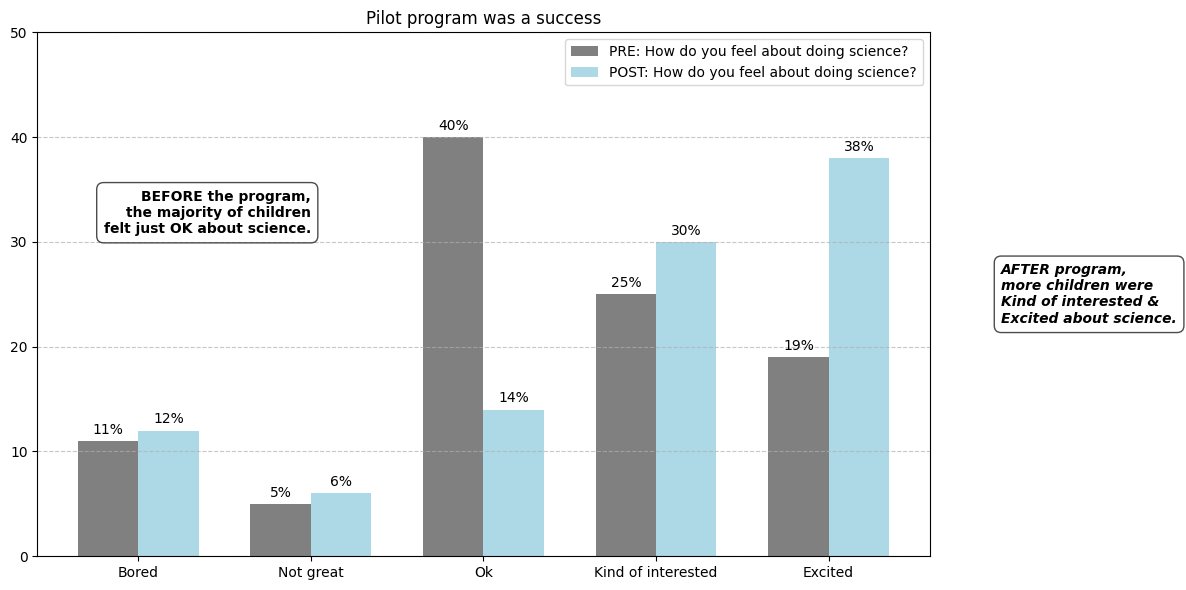

In [58]:
# FIGURE 0.5

import matplotlib.pyplot as plt

categories = ['Bored', 'Not great', 'Ok', 'Kind of interested', 'Excited']
pre_values = [11, 5, 40, 25, 19]
post_values = [12, 6, 14, 30, 38]

fig, ax = plt.subplots(figsize=(12, 6))
x = range(len(categories))
width = 0.35

rects1 = ax.bar([i - width/2 for i in x], pre_values, width, label='PRE: How do you feel about doing science?', color='grey')
rects2 = ax.bar([i + width/2 for i in x], post_values, width, label='POST: How do you feel about doing science?', color='lightblue')

for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.annotate(f'{pre_values[i]}%',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

for i, rect in enumerate(rects2):
    height = rect.get_height()
    ax.annotate(f'{post_values[i]}%',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_title('Pilot program was a success')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.set_ylim(0, 50)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

ax.text(1.0, 35, "BEFORE the program,\nthe majority of children\nfelt just OK about science.",
        fontsize=10, ha='right', va='top', weight='bold',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

ax.text(5.0, 25, "AFTER program,\nmore children were\nKind of interested &\nExcited about science.",
        fontsize=10, ha='left', va='center', weight='bold', style='italic',
        bbox=dict(facecolor='white', alpha=0.7, boxstyle='round,pad=0.5'))

fig.tight_layout()
plt.show()